In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from plb.optimizer.optim import Adam
from plb.engine.taichi_env import TaichiEnv
from plb.config.default_config import get_cfg_defaults, CN

import os
import cv2
import numpy as np
import taichi as ti
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

[Taichi] mode=release
[Taichi] preparing sandbox at /tmp/taichi-6q_9fmmn
[Taichi] version 0.7.26, llvm 10.0.0, commit e37bdb5e, linux, python 3.9.5
[Taichi] Starting on arch=cuda


In [3]:
from yacs.config import CfgNode
from plb.config import load
cfg = load("/home/hza/plasticine/toy/env2d.yml")
print(cfg)

env = TaichiEnv(cfg, nn=False, loss=False)

ENV:
  loss:
    soft_contact: False
    target_path: envs/data/Rope3D-v1.npy
    weight:
      contact: 1
      density: 10
      sdf: 10
  n_observed_particles: 200
PRIMITIVES: [{'shape': 'Sphere', 'radius': 0.03, 'init_pos': '(0.4, 0.5)', 'color': '(0.7, 0.7, 0.7)', 'init_rot': '(1., 0.)', 'lower_bound': '(0., 0.)', 'upper_bound': '(1., 1.)', 'friction': 0.9, 'action': {'dim': 2, 'scale': '(0.01, 0.01, 0.01)'}}, {'shape': 'Sphere', 'radius': 0.03, 'init_pos': '(0.6, 0.5)', 'color': '(0.7, 0.7, 0.7)', 'init_rot': '(1., 0.)', 'lower_bound': '(0., 0.)', 'upper_bound': '(1., 1.)', 'friction': 0.9, 'action': {'dim': 2, 'scale': '(0.01, 0.01, 0.01)'}}]
RENDERER:
  bake_size: 6
  camera_pos: (0.5, 2.5, 2.0)
  camera_rot: (1.0, 0.0)
  dx: 0.006666666666666667
  image_res: (512, 512)
  light_direction: (2.0, 1.0, 0.7)
  max_num_particles: 1000000
  max_ray_depth: 2
  sdf_threshold: 0.20720000000000002
  spp: 10
  target_res: (64, 64, 64)
  use_directional_light: False
  use_roulette: False
 

In [4]:
env.initialize()
#env.render(mode='plt')
#env.get_state()
state = env.get_state()

In [5]:
print(env.get_state()['state'][-1])
print(env.object_id)

[0.6 0.5 1.  0. ]
[0 0 0 ... 0 0 0]


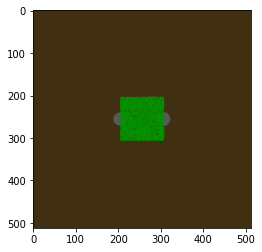

In [6]:
env.render(mode='plt')

In [7]:
print(env.simulator.substeps)
print(env.simulator.dt)
print(env.simulator.n_grid)

20
0.0001
64


In [8]:
imgs = []
print(state['state'][0].min(axis=0), state['state'][0].max(axis=0))

[0.4000145  0.40001473] [0.5999898 0.5999956]


In [9]:
#env.set_state(**state)
#env.render('plt')

In [10]:
env.set_state(**state)
N = 10000
print(env.simulator.primitives.action_dim)

4


In [11]:
for i in tqdm(range(N), total=N):
    env.step([-1, 0.0, 1., 0.])
    #pos = env.get_state()['state'][0]
    #print(pos.min(axis=0), pos.max(axis=0))
    env.render('human')

  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 